In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler


#import clean data
df = pd.read_csv("C:/Users/jhall/Desktop/D206/cleanedD206.csv")

#inspect data
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9549 entries, 0 to 9548
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            9549 non-null   int64  
 1   CaseOrder             9549 non-null   int64  
 2   Customer_id           9549 non-null   object 
 3   Interaction           9549 non-null   object 
 4   City                  9549 non-null   object 
 5   State                 9549 non-null   object 
 6   County                9549 non-null   object 
 7   Zip                   9549 non-null   int64  
 8   Lat                   9549 non-null   float64
 9   Lng                   9549 non-null   float64
 10  Population            9549 non-null   int64  
 11  Area                  9549 non-null   object 
 12  Timezone              9549 non-null   object 
 13  Job                   9549 non-null   object 
 14  Children              9549 non-null   float64
 15  Age                  

In [3]:
# Displaying summary statistcs for all the categorical data even though none of it will be used 
# in the regression and the step-by-step guide states you don't have to. 
for col in df.select_dtypes(include=['object', 'category']):
    print(f"Column: {col}")
    print(df[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')
    print("\n")

Column: Customer_id
K409198    0.01%
L285457    0.01%
S892465    0.01%
S341394    0.01%
Z342798    0.01%
           ...  
J430418    0.01%
B91628     0.01%
T210131    0.01%
A934321    0.01%
T38070     0.01%
Name: Customer_id, Length: 9549, dtype: object


Column: Interaction
aa90260b-4141-4a24-8e36-b04ce1f4f77b    0.01%
ba73354b-44c7-4169-b6c3-7f369246768d    0.01%
46f4e3bd-f5c3-412f-8a0e-eeef613d961e    0.01%
156ec05c-7f74-48d0-a20d-89018191ff0f    0.01%
bd066854-e465-473c-81b8-c048f5c3400c    0.01%
                                        ...  
00378b66-9039-42d6-8654-2768ff1f2e0e    0.01%
4d9dc102-63d7-4d3d-984c-394047251f82    0.01%
e1f535a2-8b9c-452b-b370-39a8cf96583b    0.01%
35844d9d-1573-4804-b980-7c0bed1e4810    0.01%
9de5fb6e-bd33-4995-aec8-f01d0172a499    0.01%
Name: Interaction, Length: 9549, dtype: object


Column: City
Houston         0.36%
Buffalo         0.24%
Springfield     0.24%
San Antonio     0.23%
New York        0.23%
                ...  
Derby Line      0.01%
Sh

In [33]:
# Convert 'Yes' to 1 and 'No' to 0
columns_to_convert = [
    "Tablet", "Phone", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", 'Churn'
]

for column in columns_to_convert:
    df[column] = df[column].apply(lambda x: 1 if x == 'Yes' else 0)



#Create dummy variables for Internet Services
categorical_vars = [
    'InternetService'
]

df_dummies = pd.get_dummies(df, columns=categorical_vars)

#inspecting new data set
df_dummies.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9549 entries, 0 to 9548
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   9549 non-null   int64  
 1   CaseOrder                    9549 non-null   int64  
 2   Customer_id                  9549 non-null   object 
 3   Interaction                  9549 non-null   object 
 4   City                         9549 non-null   object 
 5   State                        9549 non-null   object 
 6   County                       9549 non-null   object 
 7   Zip                          9549 non-null   int64  
 8   Lat                          9549 non-null   float64
 9   Lng                          9549 non-null   float64
 10  Population                   9549 non-null   int64  
 11  Area                         9549 non-null   object 
 12  Timezone                     9549 non-null   object 
 13  Job               

In [34]:
#Dropping Variables I don't want to use in the regression
columns_to_drop = ['InternetService_None','Unnamed: 0','Techie','Yearly_equip_failure','Outage_sec_perweek',
                   'Children','Age','Income','CaseOrder','Customer_id','Interaction','City','State','County',
                   'Zip','Lat','Lng','Population','Area','Timezone','Job','Education','Employment','Marital',
                   'Gender','Contract','Contacts','Email','Port_modem','Multiple','PaymentMethod',
                   'item1','item8','item2','item3','item4','item5','item6','item7']
df_dummies.drop(columns=[col for col in columns_to_drop if col in df_dummies], inplace=True)

df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9549 entries, 0 to 9548
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        9549 non-null   int64  
 1   Tablet                       9549 non-null   int64  
 2   Phone                        9549 non-null   int64  
 3   OnlineSecurity               9549 non-null   int64  
 4   OnlineBackup                 9549 non-null   int64  
 5   DeviceProtection             9549 non-null   int64  
 6   TechSupport                  9549 non-null   int64  
 7   StreamingTV                  9549 non-null   int64  
 8   StreamingMovies              9549 non-null   int64  
 9   PaperlessBilling             9549 non-null   int64  
 10  Tenure                       9549 non-null   float64
 11  MonthlyCharge                9549 non-null   float64
 12  Bandwidth_GB_Year            9549 non-null   float64
 13  InternetService_DS

In [35]:
#Exporting DataFrame with only Variables used in intial regression.
df_dummies.to_csv('C:/Users/jhall/Desktop/D208 part 1/D208Part2.csv', index=False)

In [36]:
# Displaying summary statistcs for all the categorical data even though none of it will be used 
# in the regression and the step-by-step guide states you don't have to. 
for col in df.select_dtypes(include=['object', 'category']):
    print(f"Column: {col}")
    print(df[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')
    print("\n")


Column: Customer_id
K409198    0.01%
L285457    0.01%
S892465    0.01%
S341394    0.01%
Z342798    0.01%
           ...  
J430418    0.01%
B91628     0.01%
T210131    0.01%
A934321    0.01%
T38070     0.01%
Name: Customer_id, Length: 9549, dtype: object


Column: Interaction
aa90260b-4141-4a24-8e36-b04ce1f4f77b    0.01%
ba73354b-44c7-4169-b6c3-7f369246768d    0.01%
46f4e3bd-f5c3-412f-8a0e-eeef613d961e    0.01%
156ec05c-7f74-48d0-a20d-89018191ff0f    0.01%
bd066854-e465-473c-81b8-c048f5c3400c    0.01%
                                        ...  
00378b66-9039-42d6-8654-2768ff1f2e0e    0.01%
4d9dc102-63d7-4d3d-984c-394047251f82    0.01%
e1f535a2-8b9c-452b-b370-39a8cf96583b    0.01%
35844d9d-1573-4804-b980-7c0bed1e4810    0.01%
9de5fb6e-bd33-4995-aec8-f01d0172a499    0.01%
Name: Interaction, Length: 9549, dtype: object


Column: City
Houston         0.36%
Buffalo         0.24%
Springfield     0.24%
San Antonio     0.23%
New York        0.23%
                ...  
Derby Line      0.01%
Sh

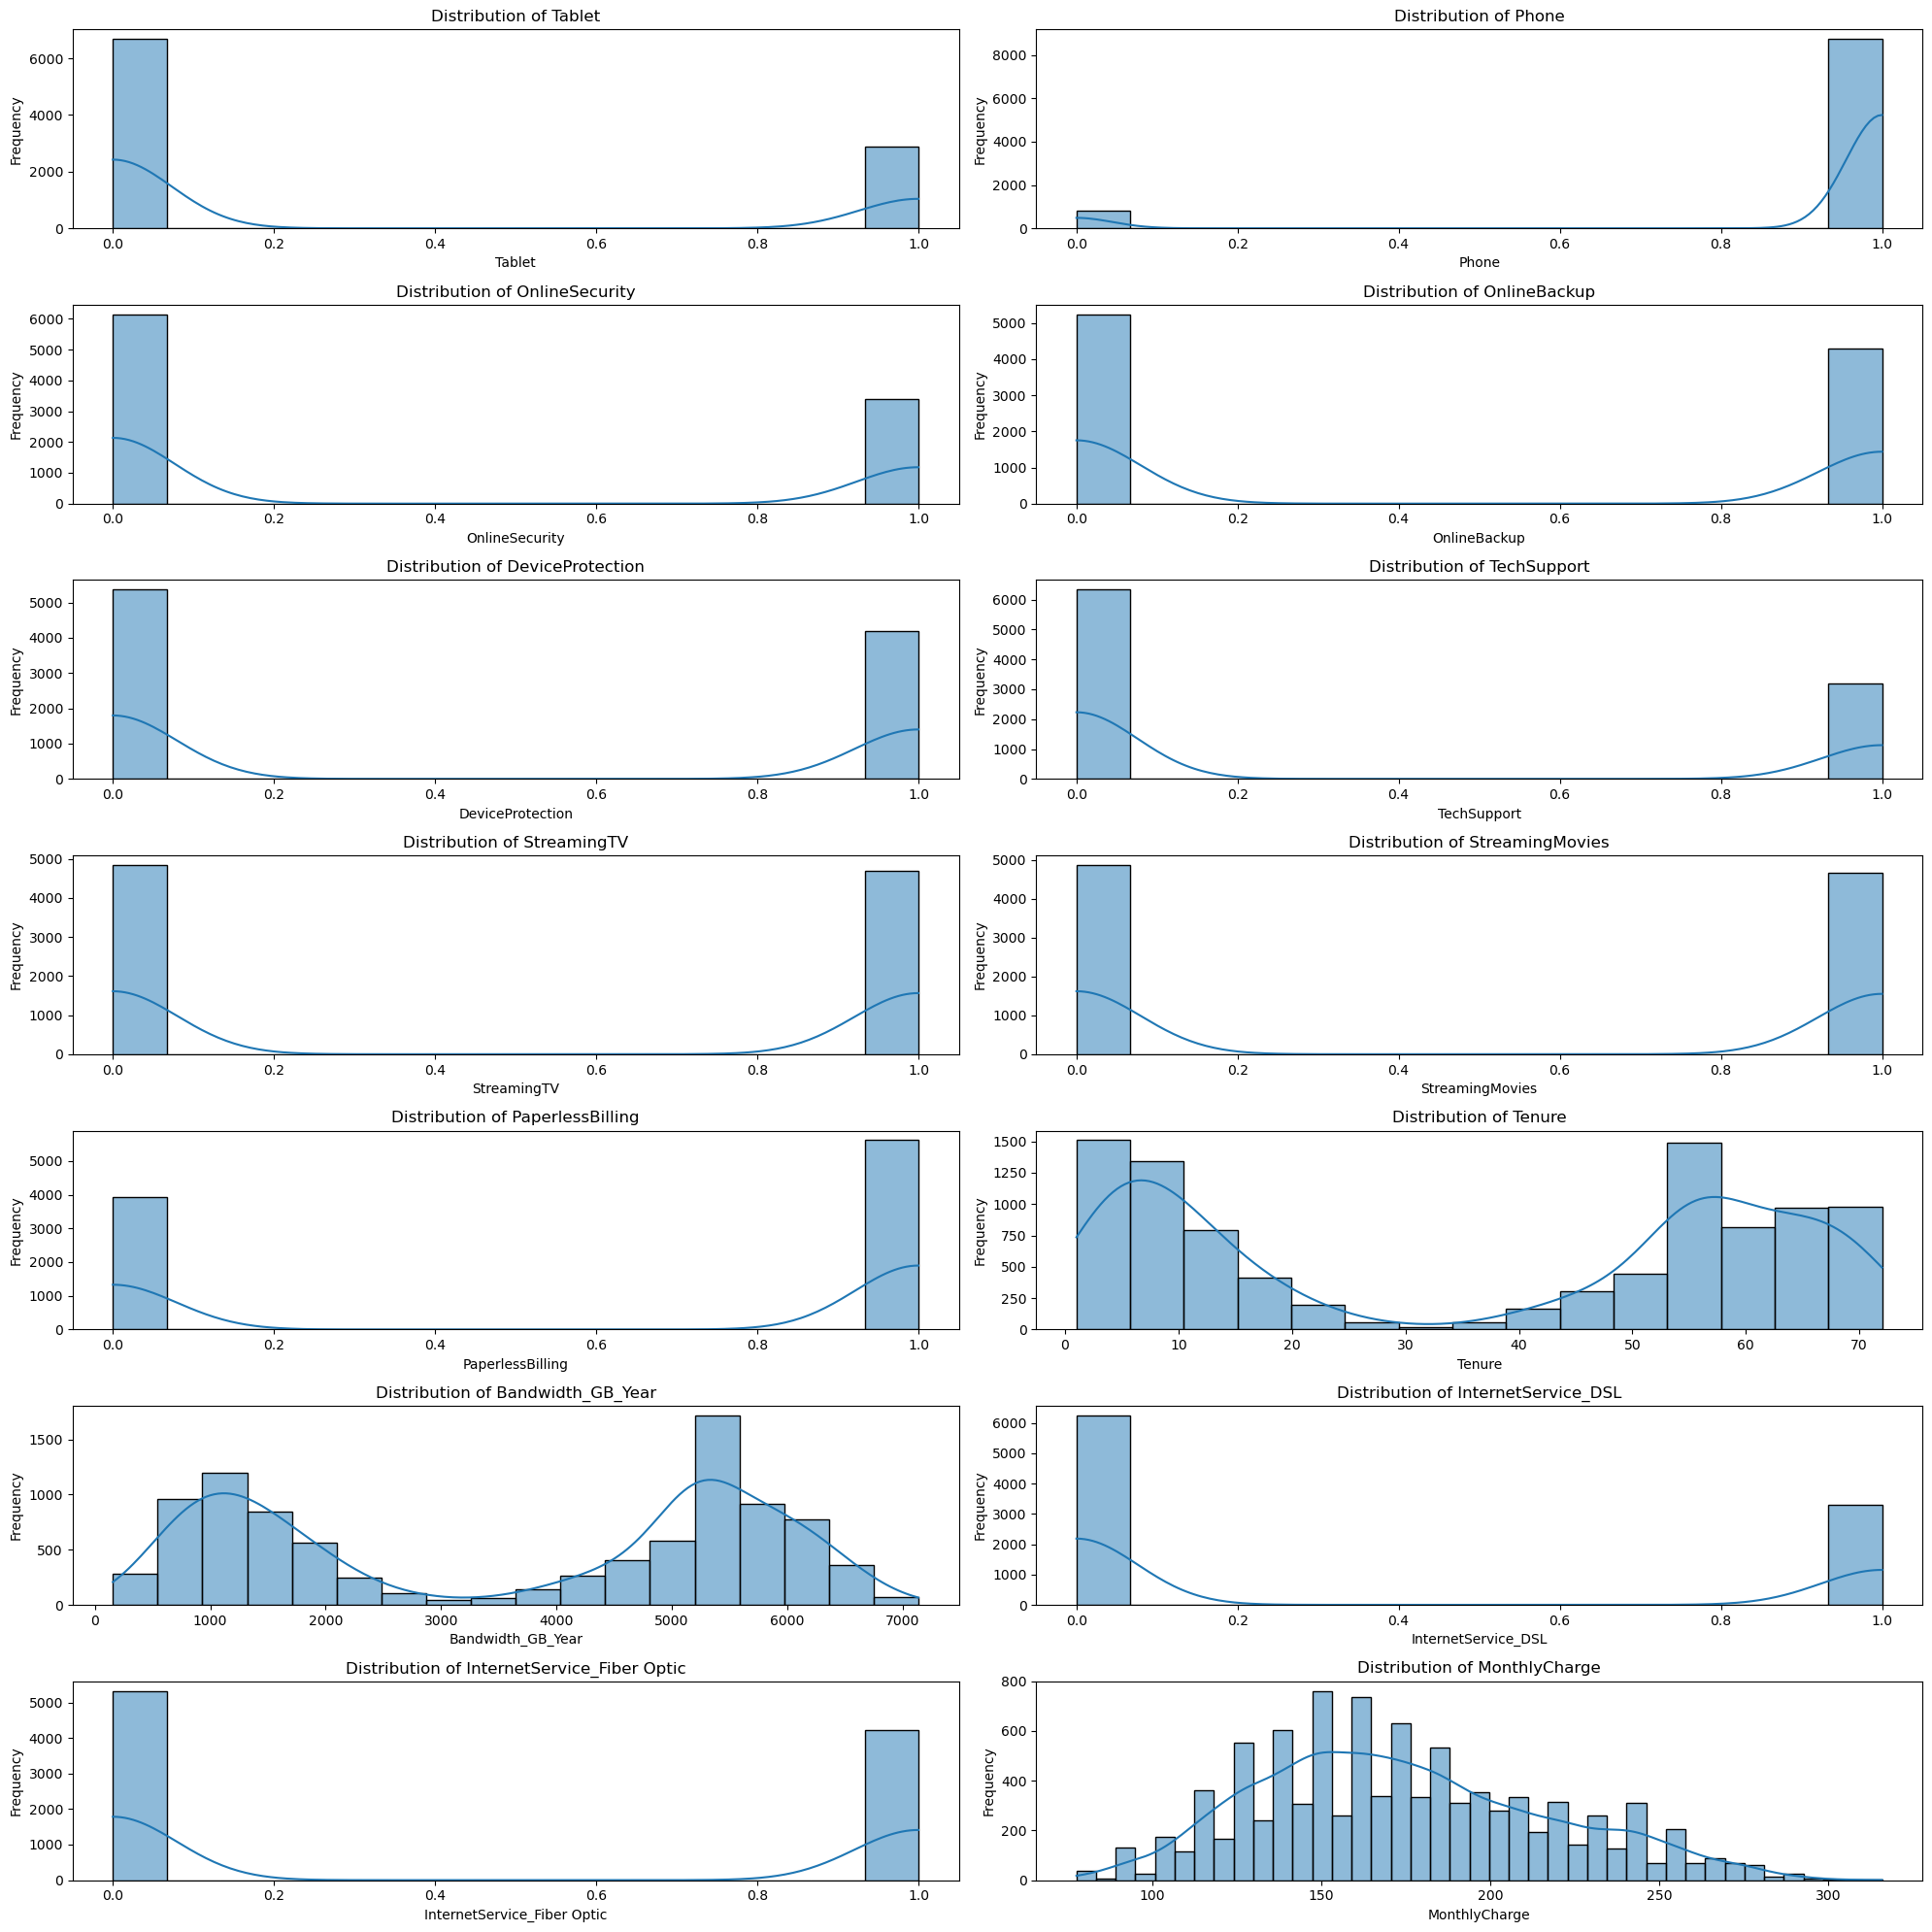

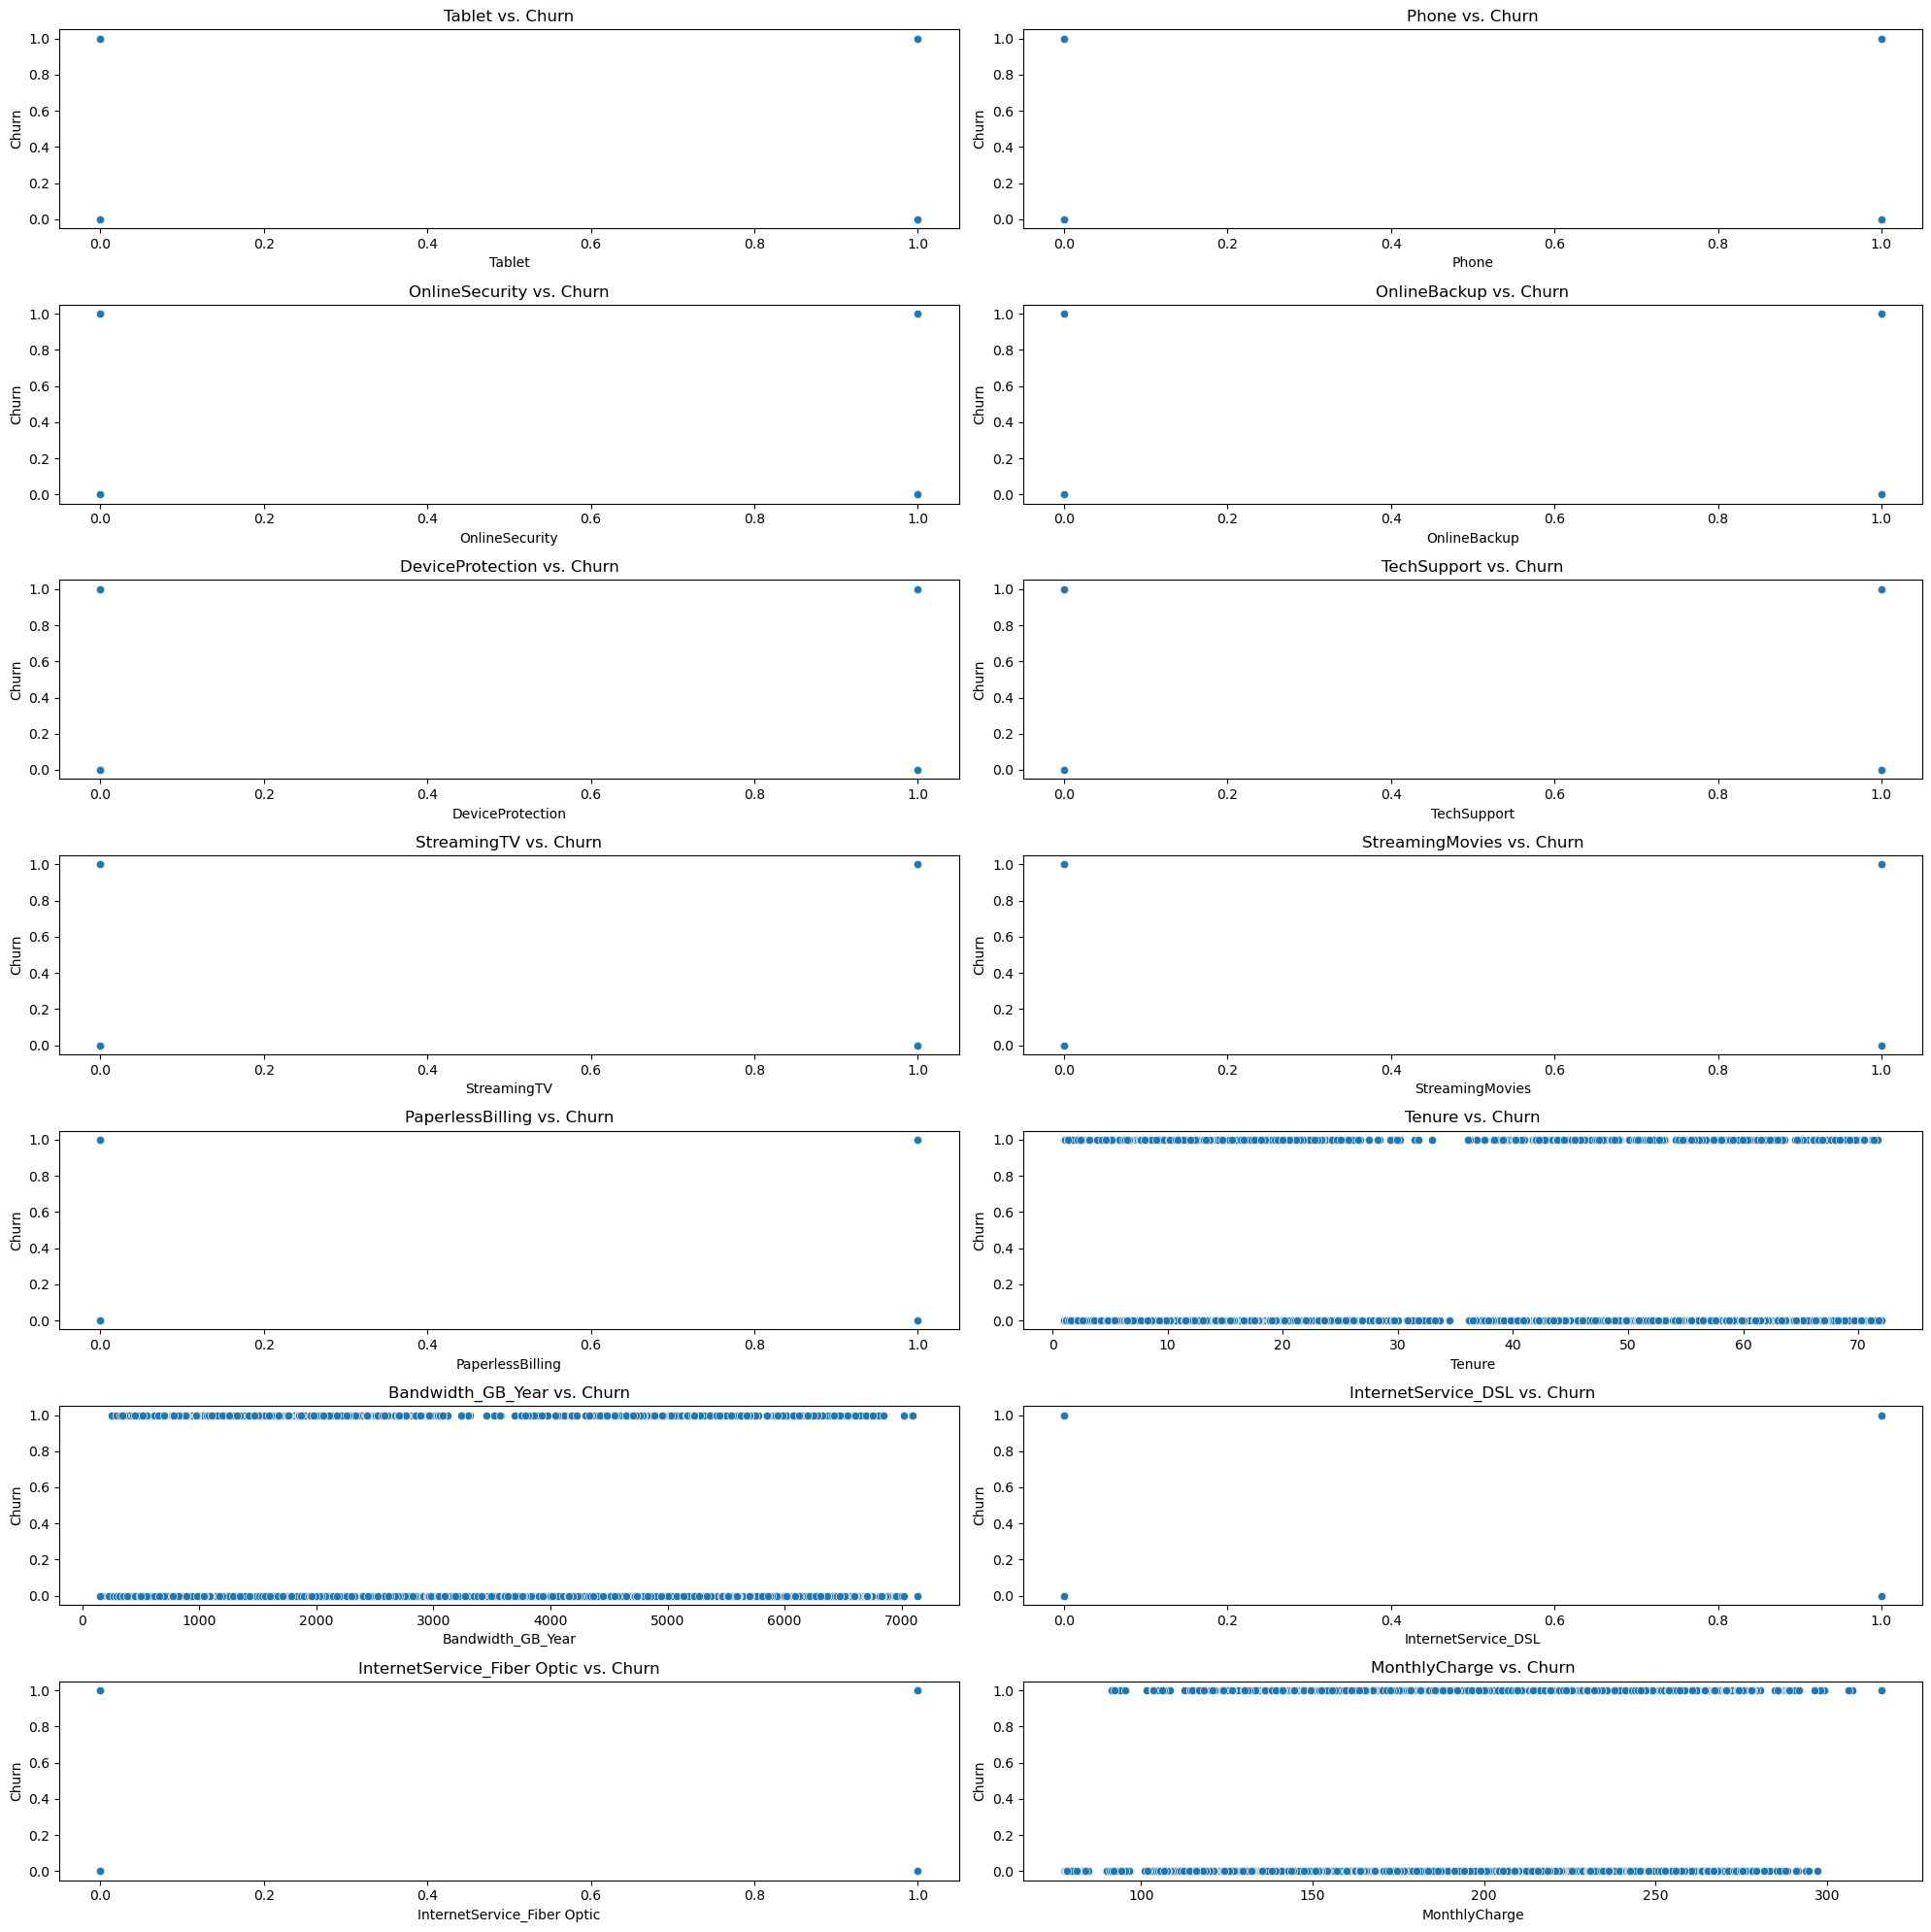

In [37]:
# List of independent variables for visualization
variables = ['Tablet', 'Phone', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
             'StreamingMovies','PaperlessBilling','Tenure','Bandwidth_GB_Year','InternetService_DSL',
             'InternetService_Fiber Optic','MonthlyCharge'
            ]

# Setting up the figure for univariate visualizations (histograms)
plt.figure(figsize=(20, 20))  

# Looping through variables for univariate histograms
for i, variable in enumerate(variables, 1): 
    plt.subplot(7, 2, i)  
    sns.histplot(df_dummies[variable], kde=True)
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Setting up the figure for bivariate visualizations (scatter plots)
plt.figure(figsize=(20, 20)) 

# Looping through variables for scatter plots
for i, variable in enumerate(variables, 1): 
    plt.subplot(7, 2, i)  
    sns.scatterplot(x=df_dummies[variable], y=df['Churn'])
    plt.title(f'{variable} vs. Churn')
    plt.xlabel(variable)
    plt.ylabel('Churn')

plt.tight_layout()
plt.show()


In [38]:
# Defining the independent variables "X" and the dependent variable "Y"
X = df_dummies[['Tablet', 'Phone', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
             'StreamingMovies','PaperlessBilling','Tenure','Bandwidth_GB_Year','InternetService_DSL',
             'InternetService_Fiber Optic','MonthlyCharge']]  
y = df_dummies['Churn']  

# Adding a constant to the model for the intercept
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display the summary of the logistic regression
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.336921
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 9549
Model:                          Logit   Df Residuals:                     9534
Method:                           MLE   Df Model:                           14
Date:                Sat, 16 Mar 2024   Pseudo R-squ.:                  0.4183
Time:                        00:32:37   Log-Likelihood:                -3217.3
converged:                       True   LL-Null:                       -5531.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.7985      0.210    -18.060      0.000   

In [39]:
#Dropping Device Protection
X = df_dummies[['Tablet', 'Phone', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV', 
             'StreamingMovies','PaperlessBilling','Tenure','Bandwidth_GB_Year','InternetService_DSL',
             'InternetService_Fiber Optic','MonthlyCharge']]  
y = df_dummies['Churn']  

# Adding a constant to the model for the intercept
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display the summary of the logistic regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.336923
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 9549
Model:                          Logit   Df Residuals:                     9535
Method:                           MLE   Df Model:                           13
Date:                Sat, 16 Mar 2024   Pseudo R-squ.:                  0.4183
Time:                        00:32:37   Log-Likelihood:                -3217.3
converged:                       True   LL-Null:                       -5531.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.7956      0.210    -18.079      0.000   

In [40]:
#Dropping Online Backup
X = df_dummies[['Tablet', 'Phone', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 
             'StreamingMovies','PaperlessBilling','Tenure','Bandwidth_GB_Year','InternetService_DSL',
             'InternetService_Fiber Optic','MonthlyCharge']]  
y = df_dummies['Churn']  

# Adding a constant to the model for the intercept
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display the summary of the logistic regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.336943
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 9549
Model:                          Logit   Df Residuals:                     9536
Method:                           MLE   Df Model:                           12
Date:                Sat, 16 Mar 2024   Pseudo R-squ.:                  0.4183
Time:                        00:32:37   Log-Likelihood:                -3217.5
converged:                       True   LL-Null:                       -5531.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.7699      0.206    -18.324      0.000   

In [41]:
#Dropping Tablet
X = df_dummies[[ 'Phone', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 
             'StreamingMovies','PaperlessBilling','Tenure','Bandwidth_GB_Year','InternetService_DSL',
             'InternetService_Fiber Optic','MonthlyCharge']]  
y = df_dummies['Churn']  

# Adding a constant to the model for the intercept
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display the summary of the logistic regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.337020
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 9549
Model:                          Logit   Df Residuals:                     9537
Method:                           MLE   Df Model:                           11
Date:                Sat, 16 Mar 2024   Pseudo R-squ.:                  0.4182
Time:                        00:32:37   Log-Likelihood:                -3218.2
converged:                       True   LL-Null:                       -5531.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.7919      0.205    -18.497      0.000   

In [42]:
#Dropping Paperless Billing
X = df_dummies[[ 'Phone', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 
             'StreamingMovies','Tenure','Bandwidth_GB_Year','InternetService_DSL',
             'InternetService_Fiber Optic','MonthlyCharge']]  
y = df_dummies['Churn']  

# Adding a constant to the model for the intercept
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display the summary of the logistic regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.337119
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 9549
Model:                          Logit   Df Residuals:                     9538
Method:                           MLE   Df Model:                           10
Date:                Sat, 16 Mar 2024   Pseudo R-squ.:                  0.4180
Time:                        00:32:37   Log-Likelihood:                -3219.2
converged:                       True   LL-Null:                       -5531.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.7378      0.201    -18.603      0.000   

In [43]:
#Dropping Tech Support
X = df_dummies[[ 'Phone', 'OnlineSecurity', 'StreamingTV', 
             'StreamingMovies','Tenure','Bandwidth_GB_Year','InternetService_DSL',
             'InternetService_Fiber Optic','MonthlyCharge']]  
y = df_dummies['Churn']  

# Adding a constant to the model for the intercept
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display the summary of the logistic regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.337351
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 9549
Model:                          Logit   Df Residuals:                     9539
Method:                           MLE   Df Model:                            9
Date:                Sat, 16 Mar 2024   Pseudo R-squ.:                  0.4176
Time:                        00:32:37   Log-Likelihood:                -3221.4
converged:                       True   LL-Null:                       -5531.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.7202      0.201    -18.534      0.000   

In [44]:
# Defining the independent variables (predictors) and the dependent variable (target)
X = df_dummies[['OnlineSecurity', 'StreamingTV', 
             'StreamingMovies','Tenure','Bandwidth_GB_Year','InternetService_DSL',
             'InternetService_Fiber Optic','MonthlyCharge']]  # Selecting predictors
y = df_dummies['Churn']  # Target variable

# Adding a constant to the model for the intercept
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display the summary of the logistic regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.338048
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 9549
Model:                          Logit   Df Residuals:                     9540
Method:                           MLE   Df Model:                            8
Date:                Sat, 16 Mar 2024   Pseudo R-squ.:                  0.4164
Time:                        00:32:37   Log-Likelihood:                -3228.0
converged:                       True   LL-Null:                       -5531.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -4.0933      0.174    -23.492      0.000   

In [45]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [46]:
X_train = sm.add_constant(X_train)  # Adding a constant to the model for the intercept

# Fit the logistic regression model on the training data
model = sm.Logit(y_train, X_train)
result = model.fit()


Optimization terminated successfully.
         Current function value: 0.335826
         Iterations 7


In [47]:
X_test = sm.add_constant(X_test)  # Adding a constant to the test data

# Predicting the probabilities
y_pred_prob = result.predict(X_test)

# Converting probabilities to binary outcomes
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Confusion Matrix:
[[1932  163]
 [ 301  469]]
Accuracy: 0.83804537521815


In [14]:
def calculate_churn_probability(features):
  
    #coefficients
    coefs = [-4.0933, 0.8929, 0.8398, 0.9795, -0.0411, -0.0004,
             -0.2681, -0.7734, 0.0249]
    
    # Add a 1 at the beginning for the intercept
    features_with_intercept = [1] + features
    
    # Calculate the log-odds
    log_odds = sum(b * x for b, x in zip(coefs, features_with_intercept))
    
    # Convert log-odds to probability
    probability = 1 / (1 + np.exp(-log_odds))
    
    return probability



In [15]:
# Line 1 of CSV

example_features = [1, 1, 0, 6.795512947, 904.5361102, 0, 1, 171.4497621]  

#Probablity
churn_probability = calculate_churn_probability(example_features)
print(churn_probability)

0.6210456993450972


In [16]:
# Variables
variables = [
    "Intercept", "OnlineSecurity", "StreamingTV",
    "StreamingMovies", "Tenure", "Bandwidth_GB_Year",
    "InternetService_DSL", "InternetService_Fiber_Optic", "MonthlyCharge"
]

# Coefficients
coefficients = [-4.0933, 0.8929, 0.8398, 0.9795, -0.0411, -0.0004, -0.2681, -0.7734, 0.0249]

# Calculate odds ratios and map them to corresponding variables
odds_ratio_dict = {variable: np.exp(coef) for variable, coef in zip(variables, coefficients)}

# Print each variable with its corresponding odds ratio
for variable, odds_ratio in odds_ratio_dict.items():
    print(f"{variable}: {odds_ratio:.4f}")


Intercept: 0.0167
OnlineSecurity: 2.4422
StreamingTV: 2.3159
StreamingMovies: 2.6631
Tenure: 0.9597
Bandwidth_GB_Year: 0.9996
InternetService_DSL: 0.7648
InternetService_Fiber_Optic: 0.4614
MonthlyCharge: 1.0252
